## Convolutional Neural Networks (CNN's)
Powerful deep networks that are widely used in image related tasks like - Image Recognition, Segmenation, Computer Vision etc Input to these networks are images!

![title](imgss/cnn2.jpeg)

## Why another type of Networks?
Problem with Multilayer Perceptrons(MLP's)

![title](imgss/cnn.jpeg)

    * Overfitting due too many parameters(~millions), while working with medium-large sized images!
    * Fail to handle variance in images - translation, rotation, illumination, size etc!

![title](imgss/invariance.png)

## Why CNN's are special?
Let's have a look out this image!

![title](imgss/cat.jpg)

#### CNN know's this is a cat.

![title](imgss/cat2.jpg)

### Even this is a cat.

![title](imgss/cat3.jpg)

### How does it happen? It's like Template Matching!

![title](imgss/conv.jpg)

## Let's understand Convolution

![title](imgss/Convolution_schematic.gif)

### Convolution layer?
* Convolution Layers are made up of filters
* but what are these filters?
### Code Example
* Let's go through one code example to understand "Filters" and "Convolution"

* When the feature is present in part of an image, the convolution operation between the filter and that part of the image results in a real number with a high value. If the feature is not present, the resulting value is low.

In [5]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2

In [7]:
def drawImg(img,title="Image"):
    plt.imshow(img,cmap='gray')
    plt.axis("off")
    plt.style.use("seaborn")
    plt.title(title+str(img.shape))
    plt.show()

(100, 100, 3)
(100, 100)


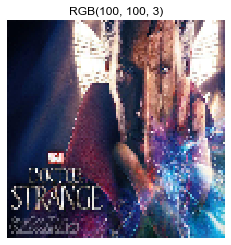

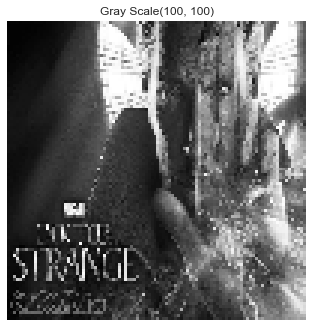

In [9]:
img_ = cv2.imread("strange.jpg")
img_ = cv2.resize(img_,(100,100))
print(img_.shape)
img = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img_gray.shape)
drawImg(img,"RGB")
drawImg(img_gray,"Gray Scale")

In [10]:
def convolutionOld(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0]
    new_img = np.zeros((W-F+1,H-F+1))
    
    for row in range(1,W-1):
        for col in range(1,H-1):
            for i in range(F):
                for j in range(F):
                    new_img[row-1][col-1] += img[row-1+i][col-1+j]*img_filter[i][j]
                if new_img[row-1][col-1] > 255:
                    new_img[row-1][col-1] = 255
                elif new_img[row-1][col-1] < 0:
                    new_img[row-1][col-1] = 0
                    
    return new_img

In [11]:
def convolution(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0]
    new_img = np.zeros((W-F+1,H-F+1))
    
    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]
                if new_img[row][col] > 255:
                    new_img[row][col] = 255
                elif new_img[row][col] < 0:
                    new_img[row][col] = 0
                    
    return new_img

In [12]:
blur_filter = np.ones((3,3))/9.0
output1 = convolution(img_gray,blur_filter)

In [13]:
edge_filter = np.array([[1,0,-1],
                        [1,0,-1],
                        [1,0,-1]])
output2 = convolution(img_gray,edge_filter)

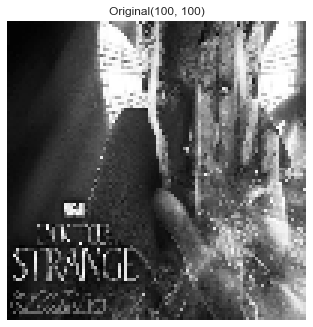

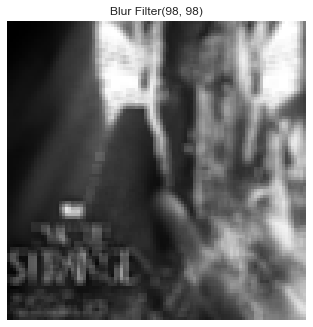

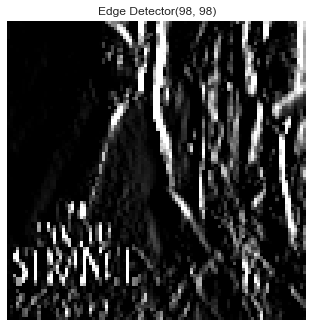

In [15]:
drawImg(img_gray,"Original")
drawImg(output1,"Blur Filter")
drawImg(output2,"Edge Detector")

### So Filters can highlight "Features" that can be useful to classify images. Color is not always important, features like edges help in detecting objects!

### Buzzwords in CNN's
* onvolution Layer
* Valid vs Same Convolution
* Padding
* Stride
* Filters/Kernels
* Pooling (Average/Maxpooling)

### Stride
* Filters can have different size as well as movement
* Stride defines how a filter should move across the image
* No of pixels we skip each time is called stride
* In our example we used a stride of (1,1) along W and H
* You can also use a stride of (2,2) in that case the output volume will have less W and H
* Input and Output Sizes: (assuming 0 padding)
$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$$$ n_C = n_{C_{prev}}$$

![title](imgss/Convolution_schematic.gif)

## padding

* Convolution operation we have seen reduces "H" and "W" of original image
* But sometimes we want the output image to have same size as input image
*So we can achieve this by adding 0 value pixels(neurons) outside the original image
This is called Padding
## Input and Output Sizes after Convolution: (with padding)

$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$$$ n_C = \text{number of filters used in the convolution}$$

In [16]:
# padding image
pad_img = np.pad(img, ((10,10), (10,10), (0,0)), 'constant', constant_values =200)

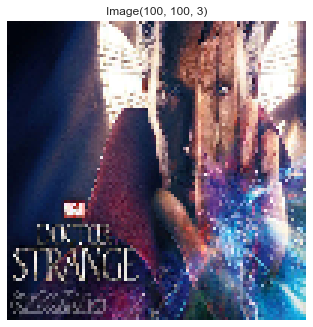

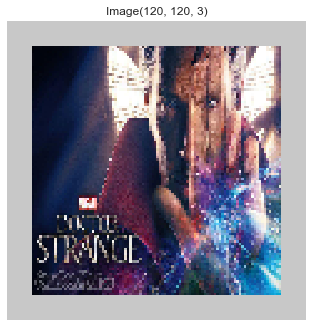

In [17]:
drawImg(img)
drawImg(pad_img)

### Pooling Layers
* Pooling is performed after Convolution Operation
* Two types of pooling layer - Average Pooling and Max Pooling

* Max-pooling layer: slides an ($f, f$) window over the input and stores the max value of the window in the output.

* Average-pooling layer: slides an ($f, f$) window over the input and stores the average value of the window in the output.

* It helps to reduce computation by discarding 75% of the neurons(assuming 2X2 filters with stride of 2)

* Makes feature detectors more robust
* No parameters for learning, only hyperparameters such as filter size.

![title](imgss/mp.png)

## Implement Pooling Operation¶

In [18]:

X = np.array([[1,0,2,3],
              [4,6,6,8],
              [3,1,1,0],
              [1,2,2,4]])

X_pool_output = np.zeros((2,2))

H,W = X.shape
f = 2
stride = 2

#Zero Padding
HO = int((H-f)/stride) + 1
WO = int((W-f)/stride) + 1

for r in range(HO):
    for c in range(WO):
        r_start = r*stride
        r_end  = r_start + f
        c_start = c*stride
        c_end = c_start + f
        
        X_slice = X[r_start:r_end,c_start:c_end]
        X_pool_output[r][c] = np.max(X_slice)

print("X \n",X)
print("X after Pooling \n",X_pool_output)

X 
 [[1 0 2 3]
 [4 6 6 8]
 [3 1 1 0]
 [1 2 2 4]]
X after Pooling 
 [[6. 8.]
 [3. 4.]]


## General CNN Architecture

![title](imgss/arch.png)